# TFM: estadística descriptiva inicial del catálogo

Copia del jupyter notebook original, con las celdas necesarias para calcular estas cosas

In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Leemos el catálogo con el que vamos a trabajar

In [2]:
cat = fits.open('ANF40pau_PAUS-COSMOS-radec-narrow-fluxes-err.fits')

In [3]:
#cat.info()

In [4]:
#cat[1].columns

In [5]:
tab = Table(cat[1].data)

In [6]:
#tab

Solo me interesan algunas columnas, convierto la tabla a pandas y filtro.

In [7]:
DF = tab.to_pandas()
#list(DF)

Columnas de interés con sus errores

In [8]:
Tab = DF[['ref_id','ra', 'dec', 'zspec', 'photoz','type', 'u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv','err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']]
#Tab

## Análisis catálogo
Una vez filtrada la tabla (**el DataFrame de trabajo bueno es Tab**) con las columnas que queremos hacemos un pequeño análisis del catálogo que tenemos

Tengo que añadir algunas columnas de interés, y manipular los datos.

- Columnas de color: con colores. *V-J*, *U-V*, *u-r*, *r-K*.
  **Importante, tenemos los flujos, de manera que los colores van como el cociente de los flujos**, mirar la ecuación de Pogson de más abajo.
  
   
- Normalizar los flujos: con la 'norma' del 'vector filtros' 

- Hemos añadido también colores entre cada par de filtros consecutivos.

In [9]:
#cociente flujos
Tab['u/V'] = Tab['u_cfht']/Tab['V_Subaru']
Tab['V/J'] = Tab['V_Subaru']/Tab['J_uv']
Tab['u/r'] = Tab['u_cfht']/Tab['r_Subaru']
Tab['r/K'] = Tab['r_Subaru']/Tab['K_uv']
Tab['B/r'] = Tab['B_Subaru']/Tab['r_Subaru']
#colores los plots del paper
Tab['V-J'] = -2.5*np.log10(Tab['V/J'])
Tab['u-V'] = -2.5*np.log10(Tab['u/V'])
Tab['r-K'] = -2.5*np.log10(Tab['r/K'])
Tab['u-r'] = -2.5*np.log10(Tab['u/r'])
#magnitudes 
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']

for i in range(len(filtros)):
    Tab[magnitudes[i]]=-48.6-2.5*np.log10(Tab[filtros[i]])
    
#colores con filtros consecutivos
#basta con hacer la resta de las columnas magnitudes consecutivamente
colores = ['u-B', 'B-V', 'V-r', 'r-i', 'i-z', 'z-Y', 'Y-J', 'J-H', 'H-K'] #9 elementos
for i in range(len(colores)): #esto itera de 0 a 8 (9elementos)
    Tab[colores[i]] = Tab[magnitudes[i]]-Tab[magnitudes[i+1]]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4116\2188853330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['u/V'] = Tab['u_cfht']/Tab['V_Subaru']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4116\2188853330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['V/J'] = Tab['V_Subaru']/Tab['J_uv']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4116\2188853330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [10]:
Tab[magnitudes].min()

m_u_cfht             17.650202
m_B_Subaru           17.025174
m_V_Subaru           16.643069
m_r_Subaru           16.426507
m_i_Subaru           16.182235
m_suprime_FDCCD_z    16.039991
m_Y_uv               15.877995
m_J_uv               15.661285
m_H_uv               15.486278
m_K_uv               15.619924
dtype: float64

In [11]:
Tab[magnitudes].max()

m_u_cfht             28.506570
m_B_Subaru           26.713948
m_V_Subaru           25.298922
m_r_Subaru           25.036866
m_i_Subaru           24.338653
m_suprime_FDCCD_z    24.014418
m_Y_uv               23.774516
m_J_uv               23.877717
m_H_uv               23.390228
m_K_uv               23.451218
dtype: float64

### Normalizar flujos

In [12]:
#Primero genero cuatro listas con los nombres de las columnas los flujos, sus errores, y los mismos normalizados
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
errfiltros = ['err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']
nerrfiltros = ['nerr_u_cfht', 'nerr_B_Subaru', 'nerr_V_Subaru', 'nerr_r_Subaru', 'nerr_i_Subaru', 'nerr_suprime_FDCCD_z', 'nerr_Y_uv', 'nerr_J_uv','nerr_H_uv','nerr_K_uv']
nfiltros = ['n_u_cfht', 'n_B_Subaru', 'n_V_Subaru', 'n_r_Subaru', 'n_i_Subaru', 'n_suprime_FDCCD_z', 'n_Y_uv', 'n_J_uv','n_H_uv','n_K_uv']

m=Tab[filtros]**2 #Tab[filtros]**2 es un df con las columnas de los filtros al cuadrado, se lo asigno a m
#m.sum(axis=1) devuelve la suma de las columnas de cada fila del df m. De manera que m.sum(axis=1)[0] p.ej. es la suma de
#la primera fila, esto es: el módulo^2 de los filtros de la primera fila.
Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
for i in range(len(filtros)):
    Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
    Tab[nerrfiltros[i]] = Tab[errfiltros[i]]/Tab['módulo_filtros']   
    
#Normalizar errores es algo que hay que pensar 2 veces pero hecho está.
#colist=list(Tab) asigna a la variable colist una lista con los encabezados de las columnas, no me hace falta ahora

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4116\2390807918.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4116\2390807918.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4116\2390807918.py:13: SettingWithCopyWarning: 
A value is trying to be set

### Tipos de galaxias

Vamos a ver cuántas galaxias hay de cada tipo, se clasifican según _type_: [leer paper]
- 0: red
- 1: green
- 2: blue

Voy a hacer 3 dataframes, extraídos del principal _Tab_, una para cada tipo de galaxia (según los colores _type_) _red, green, blue_.

12113  galaxias totales
2149  rojas que son el  17.74 % del total
1537  verdes que son el  12.69 % del total
8427  azules que son el  69.57 % del total


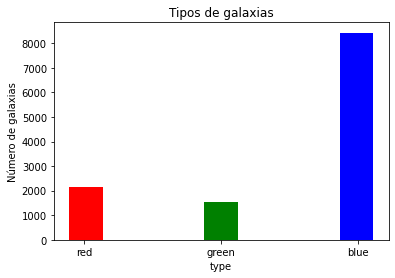

In [13]:
red=Tab.loc[Tab['type']==0]
green=Tab.loc[Tab['type']==1]
blue=Tab.loc[Tab['type']==2]

plt.hist([red['type'],green['type'],blue['type']],bins=3, rwidth=1.2, color=['red','green','blue'])
plt.xticks([0.1,1,1.9],['red','green','blue'])
plt.xlabel('type')
plt.ylabel('Número de galaxias')
plt.title('Tipos de galaxias');
print(Tab.shape[0], ' galaxias totales')
print(red.shape[0], ' rojas que son el ' ,round(red.shape[0]/Tab.shape[0]*100,2), '% del total')
print(green.shape[0], ' verdes que son el ' ,round(green.shape[0]/Tab.shape[0]*100,2), '% del total')
print(blue.shape[0], ' azules que son el ' , round(blue.shape[0]/Tab.shape[0]*100,2), '% del total')

No hay galaxias sin clasificar.

En la muestra tenemos muchas galaxias azules, son el $\frac{8427}{12113}=0.696 \rightarrow$ 70% del número total.

Vamos a ver cómo se distribuyen según redshift.

In [14]:
numerorojas, b = np.histogram(red['type'],bins=1)
numeroverdes,c=np.histogram(green['type'],bins=1)
numeroazules, d=np.histogram(blue['type'],bins=1)
numerorojas[0]

2149

12113  galaxias totales
2149  rojas que son el  17.74 % del total
1537  verdes que son el  12.69 % del total
8427  azules que son el  69.57 % del total


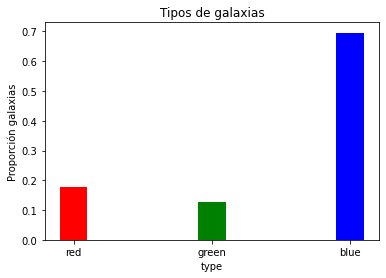

In [15]:
red=Tab.loc[Tab['type']==0]
green=Tab.loc[Tab['type']==1]
blue=Tab.loc[Tab['type']==2]

plt.bar((1,2,3),(numerorojas[0]/Tab.shape[0], numeroverdes[0]/Tab.shape[0], numeroazules[0]/Tab.shape[0]), width=0.2 ,align='center' ,color=['red','green','blue'])
plt.xticks([1,2,3],['red','green','blue'])
plt.xlabel('type')
plt.ylabel('Proporción galaxias')
plt.title('Tipos de galaxias');
print(Tab.shape[0], ' galaxias totales')
print(red.shape[0], ' rojas que son el ' ,round(red.shape[0]/Tab.shape[0]*100,2), '% del total')
print(green.shape[0], ' verdes que son el ' ,round(green.shape[0]/Tab.shape[0]*100,2), '% del total')
print(blue.shape[0], ' azules que son el ' , round(blue.shape[0]/Tab.shape[0]*100,2), '% del total')

Las galaxias se encuentran a redshift  0.5804 de media
Las rojas a redshift  0.6121  promedio
Las azules a redshift  0.585  promedio
Las verdes a redshift  0.511  promedio
El máximo redshift del catálogo es  2.7355  el mínimo  0.0


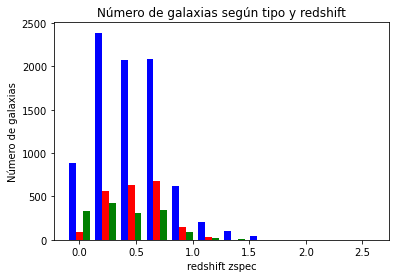

In [16]:
plt.hist([blue['zspec'], red['zspec'],green['zspec']], bins=12,color=['blue','red','green'], align='left') #royal, indian, lime
plt.xlabel('redshift zspec')
plt.ylabel('Número de galaxias')
plt.title('Número de galaxias según tipo y redshift');
print('Las galaxias se encuentran a redshift ', round(Tab['zspec'].mean(),4), 'de media')
print('Las rojas a redshift ', round(red['zspec'].mean(),4), ' promedio')
print('Las azules a redshift ', round(blue['zspec'].mean(),4), ' promedio')
print('Las verdes a redshift ', round(green['zspec'].mean(),4), ' promedio')
print('El máximo redshift del catálogo es ', round(max(Tab['zspec']),4), ' el mínimo ', min(Tab['zspec']))

Las galaxias se encuentran a redshift  0.5804 de media
Las rojas a redshift  0.6121  promedio
Las azules a redshift  0.585  promedio
Las verdes a redshift  0.511  promedio
El máximo redshift del catálogo es  2.7355  el mínimo  0.0


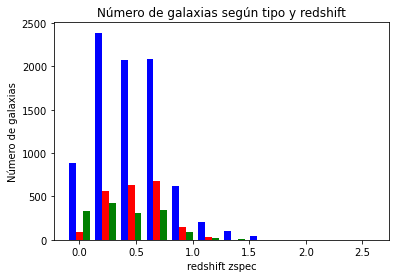

In [17]:
plt.hist([blue['zspec'], red['zspec'],green['zspec']], bins=12,color=['blue','red','green'], align='left') #royal, indian, lime
plt.xlabel('redshift zspec')
plt.ylabel('Número de galaxias')
plt.title('Número de galaxias según tipo y redshift');
print('Las galaxias se encuentran a redshift ', round(Tab['zspec'].mean(),4), 'de media')
print('Las rojas a redshift ', round(red['zspec'].mean(),4), ' promedio')
print('Las azules a redshift ', round(blue['zspec'].mean(),4), ' promedio')
print('Las verdes a redshift ', round(green['zspec'].mean(),4), ' promedio')
print('El máximo redshift del catálogo es ', round(max(Tab['zspec']),4), ' el mínimo ', min(Tab['zspec']))

In [18]:
Tab.loc[Tab['zspec']==max(Tab['zspec'])] #es la galaxia más lejana, es azul.

,ref_id,ra,dec,zspec,photoz,type,u_cfht,B_Subaru,V_Subaru,r_Subaru,...,n_suprime_FDCCD_z,nerr_suprime_FDCCD_z,n_Y_uv,nerr_Y_uv,n_J_uv,nerr_J_uv,n_H_uv,nerr_H_uv,n_K_uv,nerr_K_uv
6502,58311.0,149.82248,2.1818,2.73555,0.2,2.0,4.734422e-30,7.109312e-30,1.081175e-29,1.290604e-29,...,0.356575,0.014598,0.374202,0.027785,0.39938,0.033174,0.415001,0.040272,0.378225,0.035267


### Fotometría según tipos de galaxias

Vamos a ver el espectro de algunas galaxias, de diferentes tipos y a diferentes redshifts. Voy a usar diferentes ventanas de redshift y en cada ventana representaré el espectro indivudal de galaxias de los tres tipos.

In [19]:
colors=[red, green, blue] #lista con los dataframes de las galaxias según color

El siguiente gráfico muestra el espectro de tres galaxias de los tres tipos escogidas al azar en una ventana de redshift dada. 

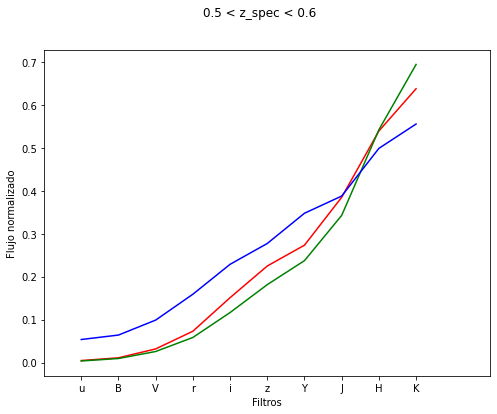

In [20]:
fig, a = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

filters=['u','B','V','r','i','z','Y','J','H','K']
plotcolor=['r','g','b']

for i in range(3):
    df=colors[i].loc[(colors[i]['zspec']>0.5)&(colors[i]['zspec']<0.55)].sample(1) #variar ventana de redshift a placer'
    a.plot(filters,[df['n_u_cfht'],df['n_B_Subaru'], df['n_V_Subaru'], df['n_r_Subaru'], df['n_i_Subaru'], df['n_suprime_FDCCD_z'], df['n_Y_uv'], df['n_J_uv'],df['n_H_uv'],df['n_K_uv']],color=plotcolor[i])
    
a.set_xlim([-1,11])
a.set_xlabel('Filtros')
a.set_ylabel('Flujo normalizado') 
fig.suptitle('0.5 < z_spec < 0.6')
plt.show()
#hacer promedio flujos según tipo, lo haré a continuacicón de esto.

Ahora, voy a representar el promedio (de flujos normalizados en cada filtro) de toda la muestra de galaxias en una ventana de redshift dada.

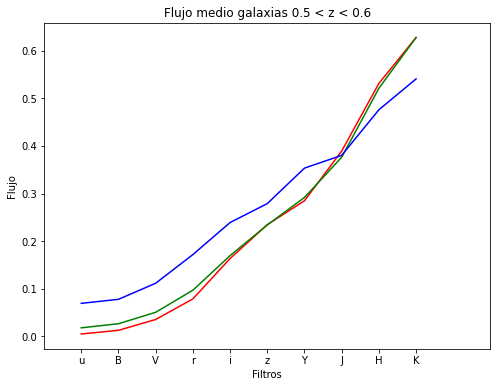

In [28]:
fig, a = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

#recuerdo que colors=[red , green , blue], una lista con los data frames de las galaxias según color
filters=['u','B','V','r','i','z','Y','J','H','K']
plotcolor=['r','g','b']

for i in range(3):
    X=colors[i].loc[(colors[i]['zspec']>0.5)&(colors[i]['zspec']<0.6)]# se puede hacer promedio con toda la población
    #(no vtna redshift) comentando esta línea desde antes .loc[...]
    a.plot(filters, X[nfiltros].mean(), color=plotcolor[i])#X[nfiltros].mean() devuelve la media
    #de cada columna por separado (de las columnas nfiltros)
    
a.set_xlim([-1,11])
a.set_xlabel('Filtros')
a.set_ylabel('Flujo') 
a.set_title('Flujo medio galaxias 0.5 < z < 0.6')
#entre 0.5 < z_spec < 0.6
#fig.suptitle('Flujo medio de galaxias')
plt.savefig('Figuras para Latex/Análisis muestra/Flujoz05-06.png')
#Probar en diferentes redshifts 0.1 y todo el catálogo también, para TFM, hacer lo mismo con clasificación KMeans

In [19]:
#fig, (a) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

#filters=['u','B','V','r','i','z','Y','J','H','K']
#plotcolor=['r','g','b']
#names=['red','green', 'blue']
#for i in range(3):
 #   df=colors[i].loc[(colors[i]['zspec']<0.5)].sample(1)
  #  a[i].scatter(filters,[df['u_cfht'],df['B_Subaru'], df['V_Subaru'], df['r_Subaru'], df['i_Subaru'], df['suprime_FDCCD_z'], df['Y_uv'], df['J_uv'],df['H_uv'],df['K_uv']],color=plotcolor[i])
   # a[i].set_xlim([-1,11])
    #a[i].set_title(names[i])

#fig.suptitle('z_spec < 0.5')
#plt.show()

In [20]:
#fig, (a) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

#filters=['u','B','V','r','i','z','Y','J','H','K']
#plotcolor=['r','g','b']
#names=['red','green', 'blue']
#for i in range(3):
 #   df=colors[i].loc[(colors[i]['zspec']>0.5)&(colors[i]['zspec']<1)].sample(1)
  #  a[i].scatter(filters,[df['u_cfht'],df['B_Subaru'], df['V_Subaru'], df['r_Subaru'], df['i_Subaru'], df['suprime_FDCCD_z'], df['Y_uv'], df['J_uv'],df['H_uv'],df['K_uv']],color=plotcolor[i])
   # a[i].set_xlim([-1,11])
    #a[i].set_title(names[i])


#fig.suptitle('0.5 < z_spec < 1')
#plt.show()

In [21]:
#fig, (a) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

#filters=['u','B','V','r','i','z','Y','J','H','K']
#plotcolor=['r','g','b']
#names=['red','green', 'blue']
#for i in (1,2):
 #   df=colors[i].loc[(colors[i]['zspec']>1.5)&(colors[i]['zspec']<2)].sample(1)
  #  a[i].scatter(filters,[df['u_cfht'],df['B_Subaru'], df['V_Subaru'], df['r_Subaru'], df['i_Subaru'], df['suprime_FDCCD_z'], df['Y_uv'], df['J_uv'],df['H_uv'],df['K_uv']],color=plotcolor[i])
   # a[i].set_xlim([-1,11])
    #a[i].set_title(names[i])

#fig.suptitle('1.5 < z_spec < 2')
#plt.show()

**No hay muestra de galaxias rojas para redshift mayor que 1.5**.

Ahora voy a hacer estos gráficos en diferentes ventanas de redshift.

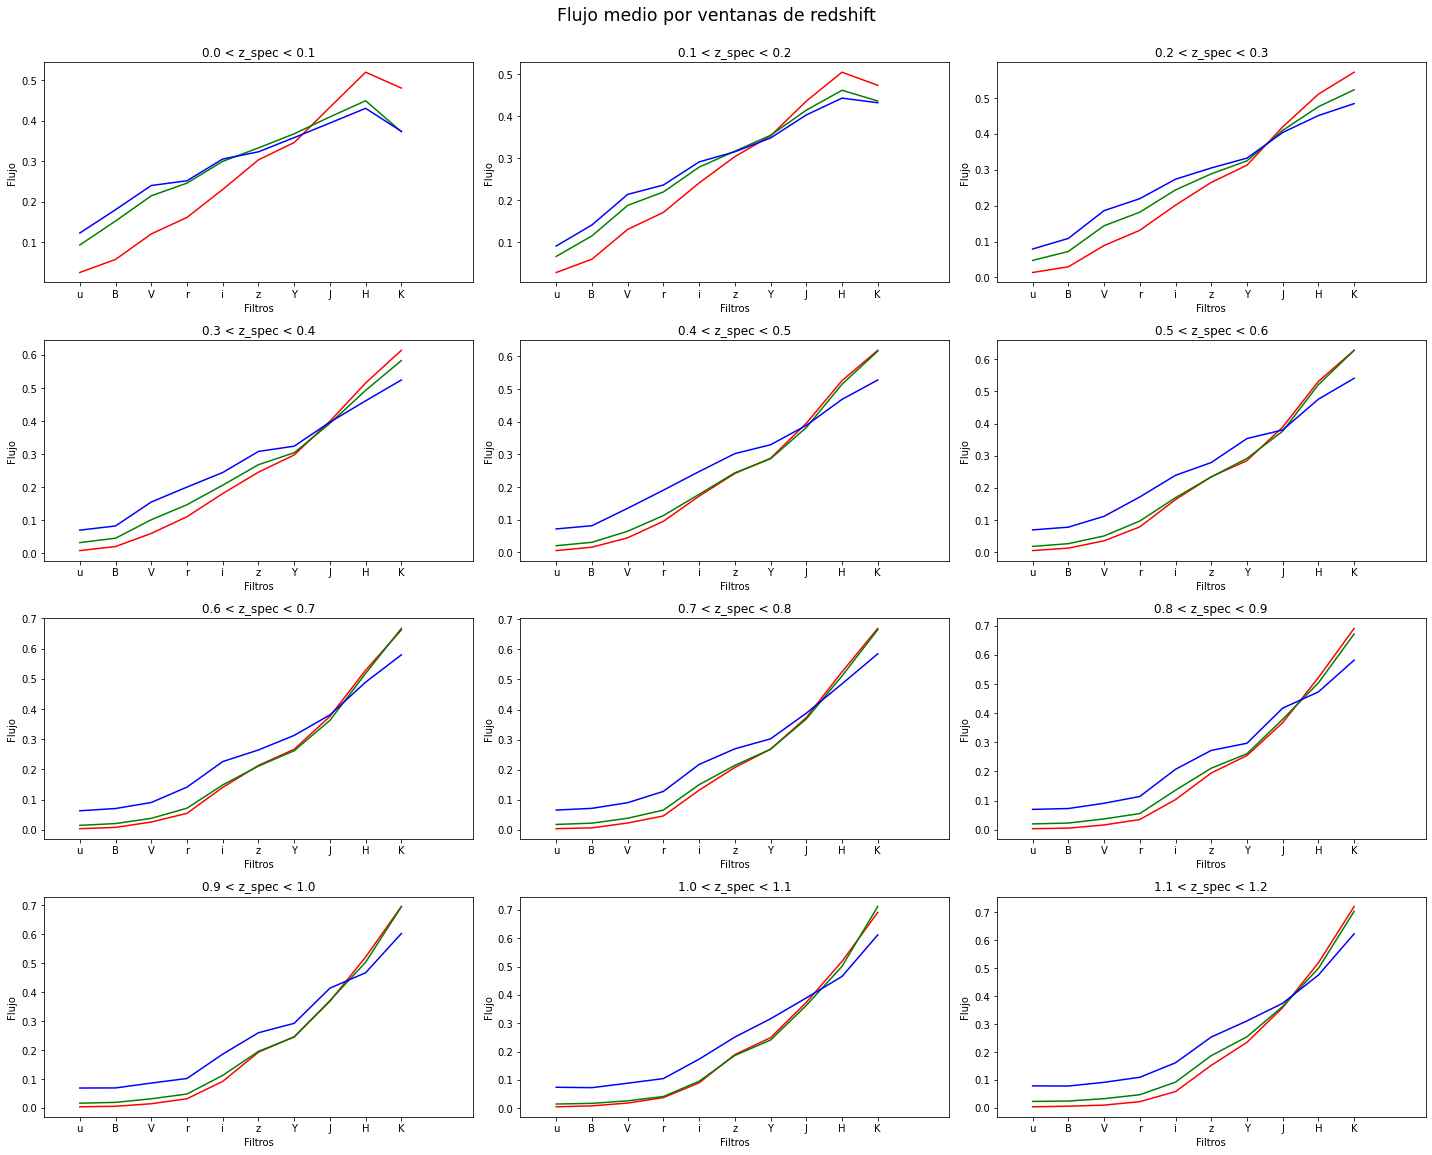

In [22]:
#Voy a representar las galaxias entre 0 y 1.25 zspec
z=np.arange(0,1.3,.1)

filters=['u','B','V','r','i','z','Y','J','H','K']
#colors=[red, green, blue]     #lista con los dataframes de las galaxias según color
#plotcolor=['r','g','b']

plt.figure(figsize=(20,16))
plt.suptitle('Flujo medio por ventanas de redshift', size='xx-large', y=1)
for j in range(len(z)-1):
    for i in range(3):
        X=colors[i].loc[(colors[i]['zspec']>z[j])&(colors[i]['zspec']<z[j+1])]
        plt.subplot(4, 3, j+1)
        plt.plot(filters, X[nfiltros].mean() ,color=plotcolor[i])
        plt.xlim([-1,11])
        plt.xlabel('Filtros')
        plt.ylabel('Flujo') 
        plt.title('{} < z_spec < {}'.format(round(z[j],1),round(z[j+1],1)))
        
plt.tight_layout()
plt.savefig('Figuras para Latex/Análisis muestra/Flujomuestratodoz.png')

___

### Diagramas color-color
Vamos a obtener el gráfico color-color (V-J)-(U-V) que aparece en el paper _The VIMOS Public Extragalactic Redshift Survey (VIPERS)
The complexity of galaxy populations at 0.4 < z < 1.3 revealed with
unsupervised machine-learning algorithms_ de _Siudek et al_, en teoría debería separar bien galaxias rojas de azules.


El color es la resta de magnitudes, estamos trabajando con flujos, luego usamos el cociente de los flujos para obtener el color. De acuerdo con la ley de Pogson:
$$m_1 - m_2 = - 2.5 \log_{10}\frac{b_1}{b_2}$$

In [23]:
#Aquí estoy usando solo el cociente de los flujos para hacer el gráfico.
#fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
#ax.scatter(red['V/J'],red['u/V'],color='r',s=2)
#ax.scatter(blue['V/J'],blue['u/V'],color='b',s=2)
#ax.scatter(green['V/J'],green['u/V'],color='g',s=2)
#ax.set_title('Diagrama uVJ cociente flujos')
#ax.set_xlabel('V / J')
#ax.set_ylabel('u / V');

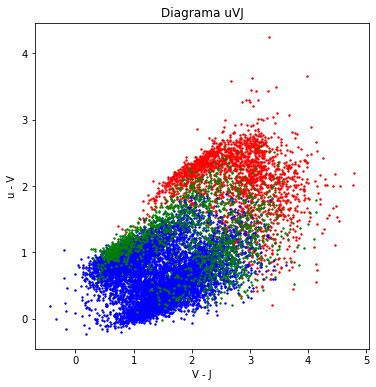

In [24]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.scatter(-2.5*np.log10([red['V/J']]), -2.5*np.log10([red['u/V']]),color='r',s=2)
ax.scatter(-2.5*np.log10([blue['V/J']]), -2.5*np.log10([blue['u/V']]),color='b',s=2)
ax.scatter(-2.5*np.log10([green['V/J']]), -2.5*np.log10([green['u/V']]),color='g',s=2)
ax.set_title('Diagrama uVJ')
#con ley de Pogson')
ax.set_xlabel('V - J')
ax.set_ylabel('u - V')
plt.savefig('Figuras para Latex/Análisis muestra/uVJ.png');

Text(0.5, 0.98, 'Redshift galaxias, color-color')

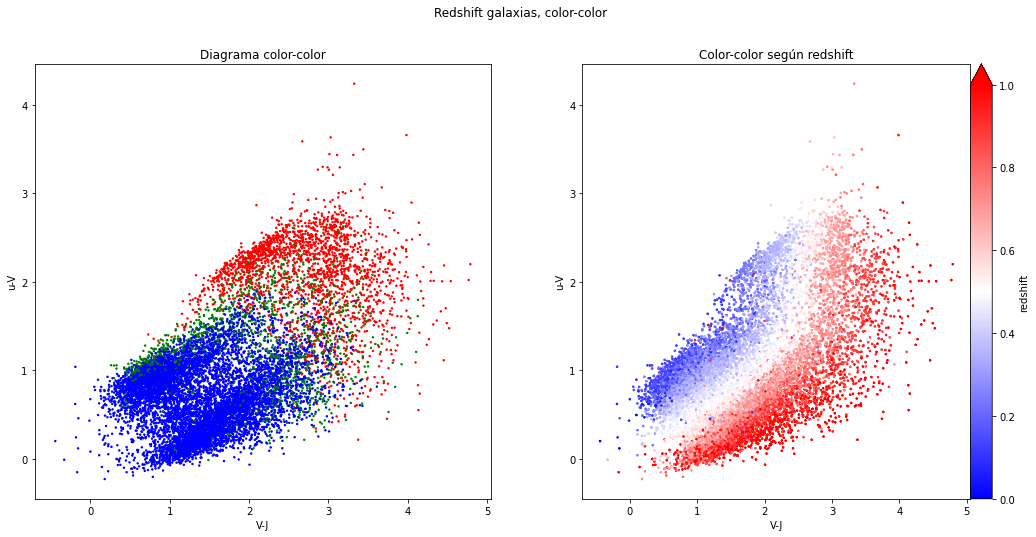

In [25]:
fig, ax=plt.subplots(1,2, figsize=(18,8))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tab['V-J'], Tab['u-V'], c=Tab['type'].map(colors), s=2)
ax[0].set_xlabel('V-J')
ax[0].set_ylabel('u-V')
ax[0].set_title('Diagrama color-color')
ax[1].scatter(Tab['V-J'], Tab['u-V'], c=Tab['zspec'], cmap='bwr' ,s=2, vmin=0, vmax=1)
ax[1].set_xlabel('V-J')
ax[1].set_ylabel('u-V')
ax[1].set_title('Color-color según redshift')
fig.colorbar(ax[1].scatter(Tab['V-J'], Tab['u-V'], c=Tab['zspec'], cmap='bwr' ,s=2,vmin=0, vmax=1) ,location='right', pad=0.0001, label='redshift', extend='max')
plt.suptitle('Redshift galaxias, color-color')

En el paper de referencia para las figuras también aseguran que el diagrama NUV r K también separa bien los tipos de galaxias. Lo calculo suponiendo que ese filtro NUV es semejante a nuestro u, o el B.

In [25]:
#fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
#ax.scatter(red['r/K'], red['u/r'],color='r',s=2)
#ax.scatter(blue['r/K'], blue['u/r'],color='b',s=2)
#ax.scatter(green['r/K'], green['u/r'],color='g',s=2)

#ax.set_ylim([-0.3,1.5]) #Hay algunos puntos que no están en el gráfico con estos límites 
#ax.set_title('Diagrama urK cociente flujos')
#ax.set_xlabel('r / K')
#ax.set_ylabel('u / r');

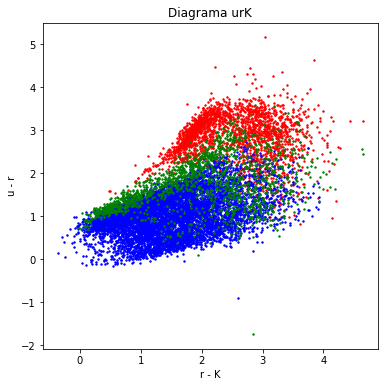

In [26]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.scatter(-2.5*np.log10([red['r/K']]), -2.5*np.log10([red['u/r']]),color='r',s=2)
ax.scatter(-2.5*np.log10([blue['r/K']]), -2.5*np.log10([blue['u/r']]),color='b',s=2)
ax.scatter(-2.5*np.log10([green['r/K']]), -2.5*np.log10([green['u/r']]),color='g',s=2)
#ax.scatter(-2.5*np.log10([Tab['r/K']]), -2.5*np.log10([Tab['u/r']]), c=Tab['type'].map(colors), s=2)
ax.set_title('Diagrama urK')
#Pogson')
ax.set_xlabel('r - K')
ax.set_ylabel('u - r')
#plt.savefig('Figuras para Latex/Análisis muestra/urK.png');

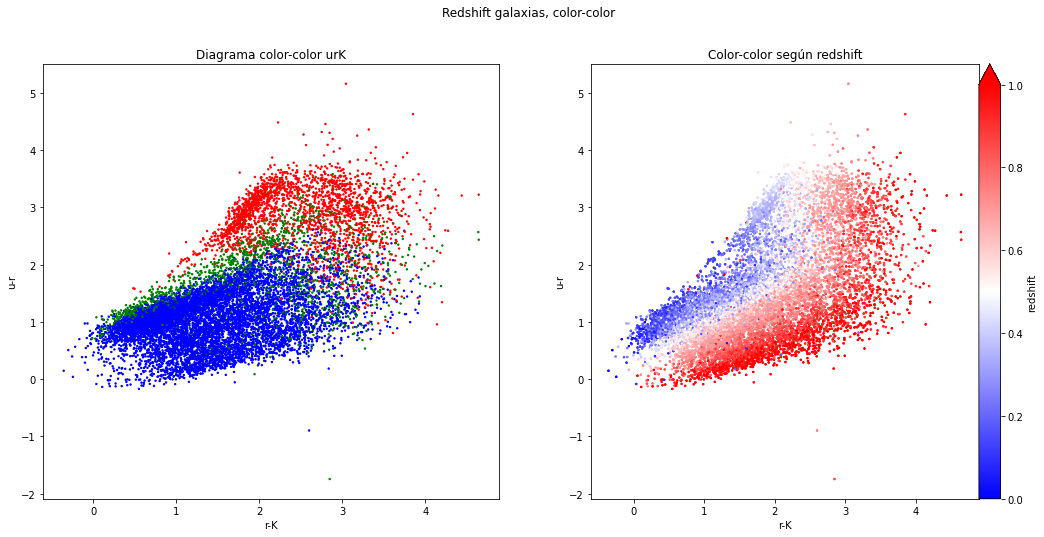

In [28]:
fig, ax=plt.subplots(1,2, figsize=(18,8))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tab['r-K'], Tab['u-r'], c=Tab['type'].map(colors), s=2)
ax[0].set_xlabel('r-K')
ax[0].set_ylabel('u-r')
ax[0].set_title('Diagrama color-color urK')
ax[1].scatter(Tab['r-K'], Tab['u-r'], c=Tab['zspec'], cmap='bwr' ,s=2, vmin=0, vmax=1)
ax[1].set_xlabel('r-K')
ax[1].set_ylabel('u-r')
ax[1].set_title('Color-color según redshift')
fig.colorbar(ax[1].scatter(Tab['r-K'], Tab['u-r'], c=Tab['zspec'], cmap='bwr' ,s=2,vmin=0, vmax=1) ,location='right', pad=0.0001, label='redshift', extend='max')
plt.suptitle('Redshift galaxias, color-color')
plt.savefig('Figuras para Latex/Componentes principales/redshift-urK.png');

Voy a representar los plots en diferentes ventanas de redshift, para ver cómo afecta el redshift al gráfico.

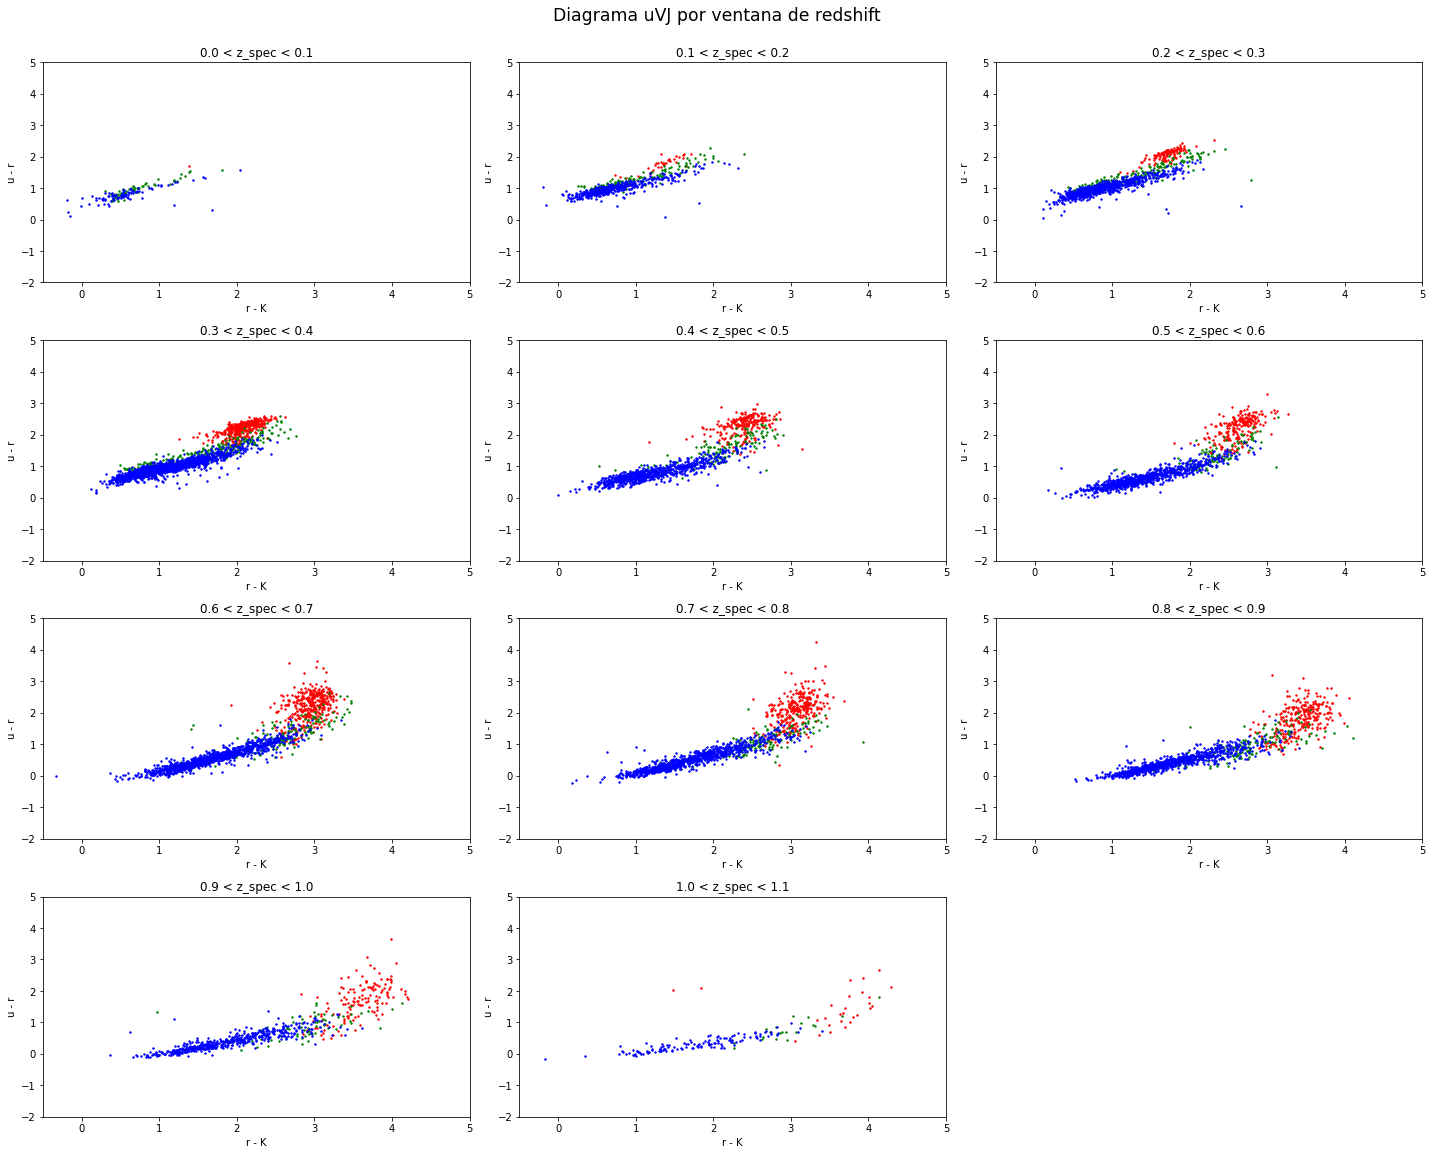

In [27]:
#Voy a representar las galaxias entre 0 y 1.25 zspec
z=np.arange(0,1.2,.1)

#colors=[red, green, blue]     #lista con los dataframes de las galaxias según color
#plotcolor=['r','g','b']

plt.figure(figsize=(20,16))
plt.suptitle('Diagrama uVJ por ventana de redshift', size='xx-large', y=1)
for j in range(len(z)-1):
    for i in range(3):
        X=colors[i].loc[(colors[i]['zspec']>z[j])&(colors[i]['zspec']<z[j+1])]
        plt.subplot(4, 3, j+1)
        plt.scatter(-2.5*np.log10([X['V/J']]), -2.5*np.log10([X['u/V']]),color=plotcolor[i], s=2)
        plt.xlim([-0.5,5])
        plt.ylim([-2, 5])
        plt.xlabel('r - K')
        plt.ylabel('u - r') 
        plt.title('{} < z_spec < {}'.format(round(z[j],1),round(z[j+1],1)))
        
plt.tight_layout();

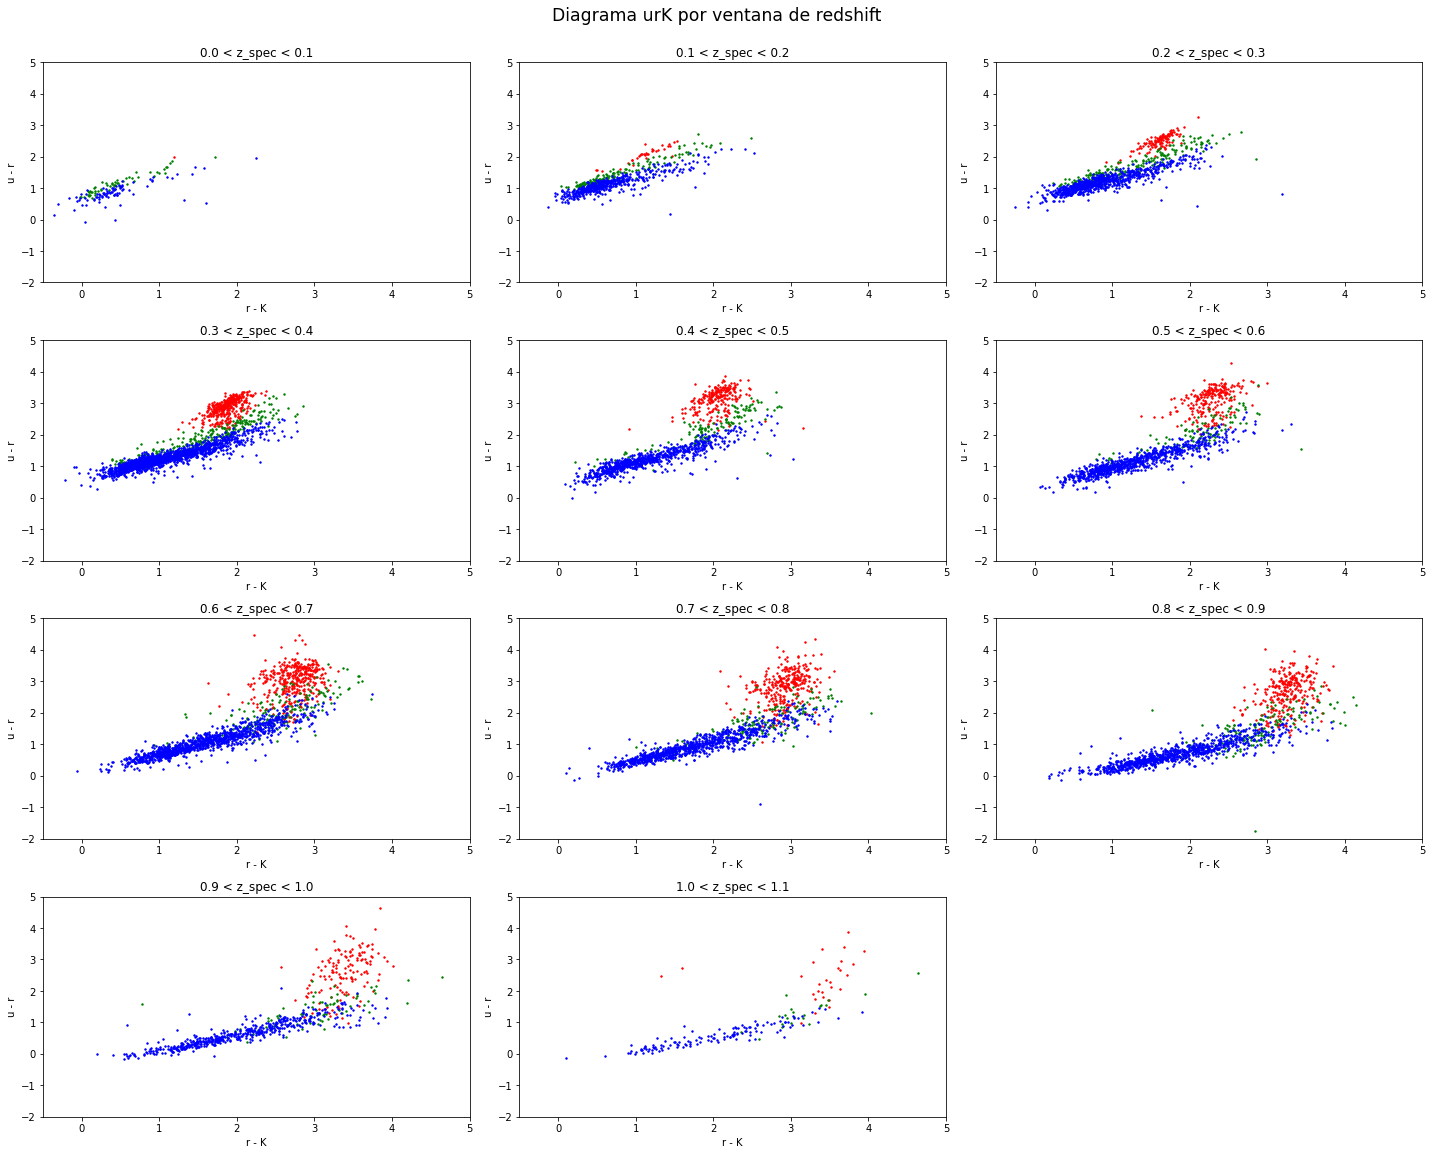

In [28]:
#Voy a representar las galaxias entre 0 y 1.25 zspec
z=np.arange(0,1.2,.1)

#colors=[red, green, blue]     #lista con los dataframes de las galaxias según color
#plotcolor=['r','g','b']

plt.figure(figsize=(20,16))
plt.suptitle('Diagrama urK por ventana de redshift', size='xx-large', y=1)
for j in range(len(z)-1):
    for i in range(3):
        X=colors[i].loc[(colors[i]['zspec']>z[j])&(colors[i]['zspec']<z[j+1])]
        plt.subplot(4, 3, j+1)
        plt.scatter(-2.5*np.log10([X['r/K']]), -2.5*np.log10([X['u/r']]),color=plotcolor[i], s=2)
        plt.xlim([-0.5,5])
        plt.ylim([-2, 5])
        plt.xlabel('r - K')
        plt.ylabel('u - r') 
        plt.title('{} < z_spec < {}'.format(round(z[j],1),round(z[j+1],1)))
        
plt.tight_layout();

In [29]:
# z=np.arange(0,1.2,.1)
# for j in range(len(z)-1):
#     print(j)